In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import torch
from torchvision.utils import make_grid, save_image

## MADE

In [2]:
sns.set(font_scale=2.5)
def retrieve_data(filename):
    data = np.load(os.path.join('plot_data', filename + '.npz'))
    images = data['images']
    times = data['times']
    return images, times

def plot_iter(filename, color):
    images, times = retrieve_data(filename)
    error = images - images[-1:,...]
    error = np.linalg.norm(error, axis=-1)
    error_m = np.mean(error, axis=1)
    error_std = np.std(error, axis=1)
    
    delta = images[1:, ...] - images[:-1,...]
    delta = np.linalg.norm(delta, axis=-1)
    delta_m = np.mean(delta, axis=1)
    delta_std = np.std(delta, axis=1)
        
    xs = np.r_[0:len(images)]
    dxs = np.r_[1:len(images)]
    if 'jacobi_gs' in filename:
        xs = 2 * xs
        dxs = 2 * dxs
    plt.plot(xs, error_m, '-', lw=6, color=color)
    plt.fill_between(xs, error_m + error_std, error_m - error_std , facecolor=color, alpha=0.5)
    plt.plot(dxs, delta_m, '--', lw=6, color=color)
    plt.fill_between(dxs, delta_m + delta_std, delta_m - delta_std, facecolor=color, alpha=0.5)
    plt.xlabel('Parallel Iterations')
    #plt.ylabel('Error')
    #plt.ylabel('reconstruction error')
    
def plot_time(filename, color):
    images, times = retrieve_data(filename)
    error = images - images[-1:,...]
    error = np.linalg.norm(error, axis=-1)
    error_m = np.mean(error, axis=1)
    error_std = np.std(error, axis=1)
    
    delta = images[1:, ...] - images[:-1,...]
    delta = np.linalg.norm(delta, axis=-1)
    delta_m = np.mean(delta, axis=1)
    delta_std = np.std(delta, axis=1)
        
    times = times - times[0]
    if 'jacobi_gs' in filename:
        times = 2 * times
        
    plt.plot(times, error_m, '-', lw=6, color=color)
    plt.fill_between(times, error_m + error_std, error_m - error_std , facecolor=color, alpha=0.5)
    plt.plot(times[1:], delta_m, '--', lw=6, color=color)
    plt.fill_between(times[1:], delta_m + delta_std, delta_m - delta_std, facecolor=color, alpha=0.5)
    plt.xlabel('Wall-Clock Time (s)')
    #plt.ylabel('Error') 

def get_time_and_iter(filename):
    images, times = retrieve_data(filename)
    error = images - images[-1:,...]
    error = np.linalg.norm(error, axis=-1)
    error_m = np.mean(error, axis=1)
    times = times - times[0]
    num_iters = (error_m != 0.).cumprod().sum()
    return num_iters, times[num_iters - 1]

In [3]:
get_time_and_iter('made_mnist_sequential')

(784, 0.34283971786499023)

In [4]:
get_time_and_iter('made_mnist_jacobi')

(31, 0.01262211799621582)

In [5]:
get_time_and_iter('made_cifar_sequential')

(3072, 3.0264463424682617)

In [6]:
get_time_and_iter('made_cifar_jacobi')

(92, 0.11942696571350098)

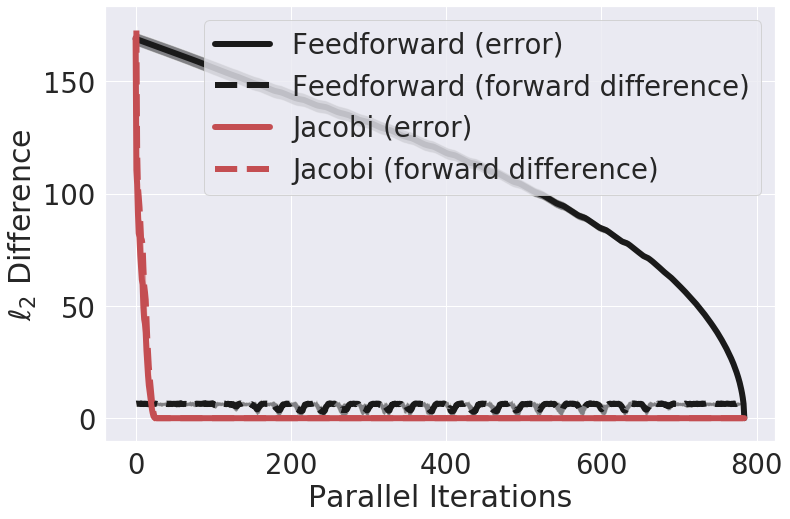

In [7]:
plt.figure(figsize=(12,8))
plot_iter('made_mnist_sequential', 'k')
plot_iter('made_mnist_jacobi', 'r')
plt.legend(['Feedforward (error)', 'Feedforward (forward difference)', 'Jacobi (error)', 'Jacobi (forward difference)'], loc=1)
plt.ylabel(r'$\ell_2$ Difference')
plt.savefig('made_mnist_time_nolog_iter.png', dpi=200, bbox_inches='tight')

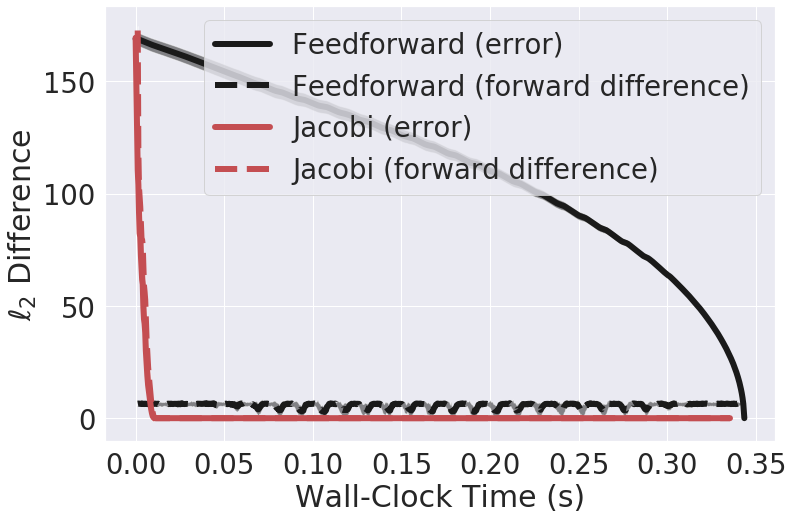

In [8]:
plt.figure(figsize=(12,8))
plot_time('made_mnist_sequential', 'k')
plot_time('made_mnist_jacobi', 'r')
plt.legend(['Feedforward (error)', 'Feedforward (forward difference)', 'Jacobi (error)', 'Jacobi (forward difference)'], loc=1)
plt.ylabel(r'$\ell_2$ Difference')
plt.savefig('made_mnist_time_nolog.png', dpi=200, bbox_inches='tight')

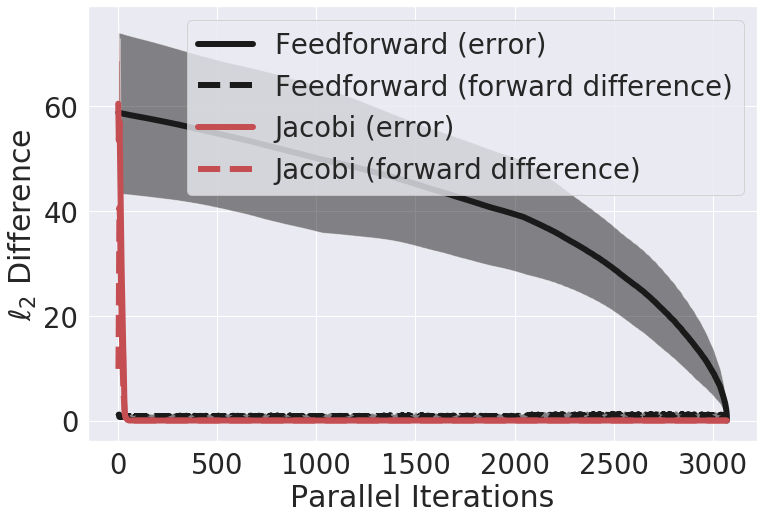

In [9]:
plt.figure(figsize=(12,8))
plot_iter('made_cifar_sequential', 'k')
plot_iter('made_cifar_jacobi', 'r')
plt.legend(['Feedforward (error)', 'Feedforward (forward difference)', 'Jacobi (error)', 'Jacobi (forward difference)'], loc=1)
plt.ylabel(r'$\ell_2$ Difference')
plt.savefig('made_cifar_time_nolog_iter.png', dpi=200, bbox_inches='tight')

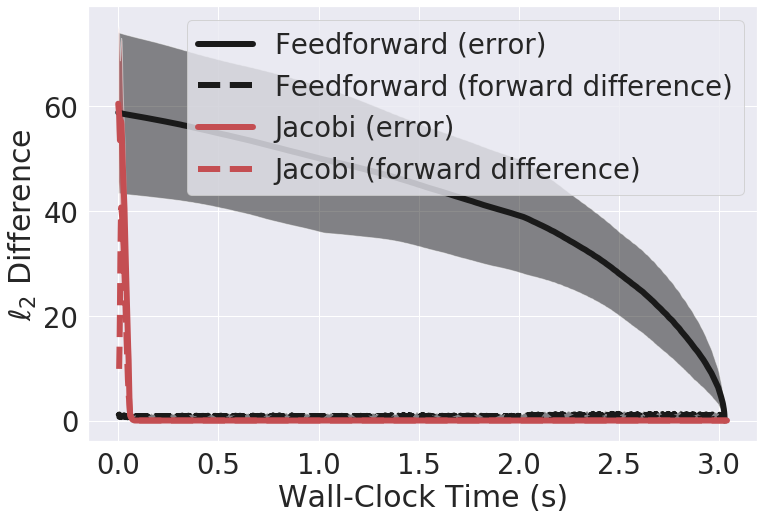

In [10]:
plt.figure(figsize=(12,8))
plot_time('made_cifar_sequential', 'k')
plot_time('made_cifar_jacobi', 'r')
plt.legend(['Feedforward (error)', 'Feedforward (forward difference)', 'Jacobi (error)', 'Jacobi (forward difference)'], loc=1)
plt.ylabel(r'$\ell_2$ Difference')
plt.savefig('made_cifar_time_nolog.png', dpi=200, bbox_inches='tight')

## Sample demonstration

### MNIST

In [14]:
images1, _ = retrieve_data('made_mnist_sequential')
images2, _ = retrieve_data('made_mnist_jacobi')

img_idx = 8

idx = [5 * x for x in range(10)] + [784]
seq_images = images1[idx, img_idx, :].reshape(-1, 1, 28, 28)
j_images = images2[idx, img_idx, :].reshape(-1, 1, 28, 28)
seq_images = torch.sigmoid(torch.from_numpy(seq_images))
j_images = torch.sigmoid(torch.from_numpy(j_images))

images = torch.cat([seq_images, j_images], dim=0)
grid = make_grid(images, nrow=11, padding=1, pad_value=0)
save_image(grid, 'made_mnist.png')

### CIFAR-10

In [15]:
images1, _ = retrieve_data('made_cifar_sequential')
images2, _ = retrieve_data('made_cifar_jacobi')

img_idx = 8

idx = [5 * x for x in range(10)] + [3024]
seq_images = images1[idx, img_idx, :].reshape(-1, 3, 32, 32)
j_images = images2[idx, img_idx, :].reshape(-1, 3, 32, 32)
seq_images = torch.sigmoid(torch.from_numpy(seq_images))
j_images = torch.sigmoid(torch.from_numpy(j_images))

images = torch.cat([seq_images, j_images], dim=0)
grid = make_grid(images, nrow=11, padding=1, pad_value=0)
save_image(grid, 'made_cifar.png')